In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### We want to discover if there is any relationship between health resouces and socio demographic data. Choose one target variable (related to health resources), and use the LASSO model to reduce features to the most important ones for your target.

In [2]:
# Example importing the CSV here
#Step 1

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')

pd.set_option('display.max_columns',110)

df.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  \
count               3140.000000  3.140000e+03               3140.000000   
mean                  12.283979  1.391649e+04                 11.751535   
std                    3.126297  4.899095e+04                  1.696599   
min                    0.000000  1.100000e+01                  6.092789   
25%                   10.496774  1.232750e+03                 10.689322   
50%                   11.772649  3.000500e+03                 11.580861   
75%                   13.182260  8.314250e+03                 12.639379   
max                   37.570198  1.501844e+06                 22.225129   

              40-49  40-49 y/o % of total pop         50-59  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.288521e+04                 11.556685  1.363803e+04   
std    4.347219e+04                  1.372935  4.272063e+04   
min    4.000000e+00                  2.631579  1.400000e+01   
25%    1.245250e+03                 10.685197  1.483000e+03   
50%    3.048500e+03                 11.618372  3.515500e+03   
75%    8.120500e+03                 12.386083  9.157250e+03   
max    1.350076e+06                 19.430369  1.306003e+06   

       50-59 y/o % of total pop         60-69  60-69 y/o % of total pop  \
count               3140.000000  3.140000e+03               3140.000000   
mean                  13.526733  1.191621e+04                 13.182225   
std                    1.481692  3.451858e+04                  2.532498   
min                    5.316361  2.000000e+01                  3.444403   
25%                   12.738561  1.476500e+03                 11.621232   
50%                   13.621339  3.410000e+03                 13.013409   
75%                   14.429115  8.710500e+03                 14.467254   
max                   20.454545  1.014325e+06                 27.272727   

               70-79  70-79 y/o % of total pop            80+  \
count    3140.000000               3140.000000    3140.000000   
mean     7220.310510                  8.399382    4035.541720   
std     20287.498429                  2.214915   12063.782251   
min         6.000000                  2.199551       0.000000   
25%       950.750000                  7.032275     533.000000   
50%      2177.000000                  8.208162    1160.000000   
75%      5574.000000                  9.445777    2899.750000   
max    572530.000000                 31.327959  356275.000000   

       80+ y/o % of total pop  White-alone pop  % White-alone  \
count             3140.000000     3.140000e+03    3140.000000   
mean                 4.733801     7.965979e+04      84.494109   
std                  1.535028     2.372880e+05      16.348987   
min  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
df.sample(10)

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
2435  47019    56351   5242                9.302408    6169   
2754  48467    56019   6698               11.956658    7556   
1921  37067   379099  46665               12.309450   52008   
1043  21105     4421    434                9.816784     493   
1091  21201     2135    228               10.679157     254   
19     1039    36986   4438               11.999135    4397   
784   18179    28206   3812               13.514855    3740   
2637  48233    21198   2921               13.779602    3051   
503   13241    16867   1442                8.549238    1740   
1750  32011     2003    245               12.231653     271   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
2435                 10.947454   6537                 11.600504   6450   
2754                 13.488281   5975                 10.666024   6057   
1921                 13.718844  50925                 13.433167  47373   
1043                 11.151323    419                  9.477494    463   
1091                 11.896956    232                 10.866511    200   
19                   11.888282   4187                 11.320500   4094   
784                  13.259590   3229                 11.447919   3272   
2637                 14.392867   2533                 11.949240   2651   
503                  10.316002   1727                 10.238928   1606   
1750                 13.529705    171                  8.537194    236   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
2435                 11.446115   7231                 12.832070   8204   
2754                 10.812403   6753                 12.054839   7750   
1921                 12.496208  47062                 12.414172  50993   
1043                 10.472744    514                 11.626329    648   
1091                  9.367681    262                 12.271663    343   
19                   11.069053   4178                 11.296166   5141   
784                  11.600369   3183                 11.284833   3827   
2637                 12.505897   2582                 12.180394   2533   
503                   9.521551   1949                 11.555108   2334   
1750                 11.782327    272                 13.579631    334   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
2435                 14.558748   7965                 14.134621   5633   
2754                 13.834592   7406                 13.220514   5134   
1921                 13.451104  43526                 11.481434  25875   
1043                 14.657317    626                 14.159692    506   
1091                 16.065574    277                 12.974239    218   
19                   13.899854   5037                 13.618667   3508   
784                  13.568035   3615                 12.816422   2139   
2637                 11.949240   2590                 12.218134   1452   
503                  13.837671   2810                 16.659750   2275   
1750                 16.674988    263                 13.130305    150   

      70-79 y/o % of total pop    80+  80+ y/o % of total pop  \
2435                  9.996273   2920                5.181807   
2754                  9.164748   2690                4.801942   
1921                  6.825394  14672                3.870229   
1043                 11.445374    318                7.192943   
1091                 10.210773    121                5.667447   
19                    9.484670   2006                5.423674   
784                   7.583493   1389                4.924484   
2637                  6.849703    885                4.174922   
503                  13.487876    984                5.833877   
1750                  7.488767     61                3.045432   

      White-alone pop  % White-alone  Black-alone pop  % Black-alone  \
2435            54296      96.353215              894       1.586485   
2754    

In [13]:
##hacemos la lista de variable
list(df.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [5]:
len(list(df.columns))

108

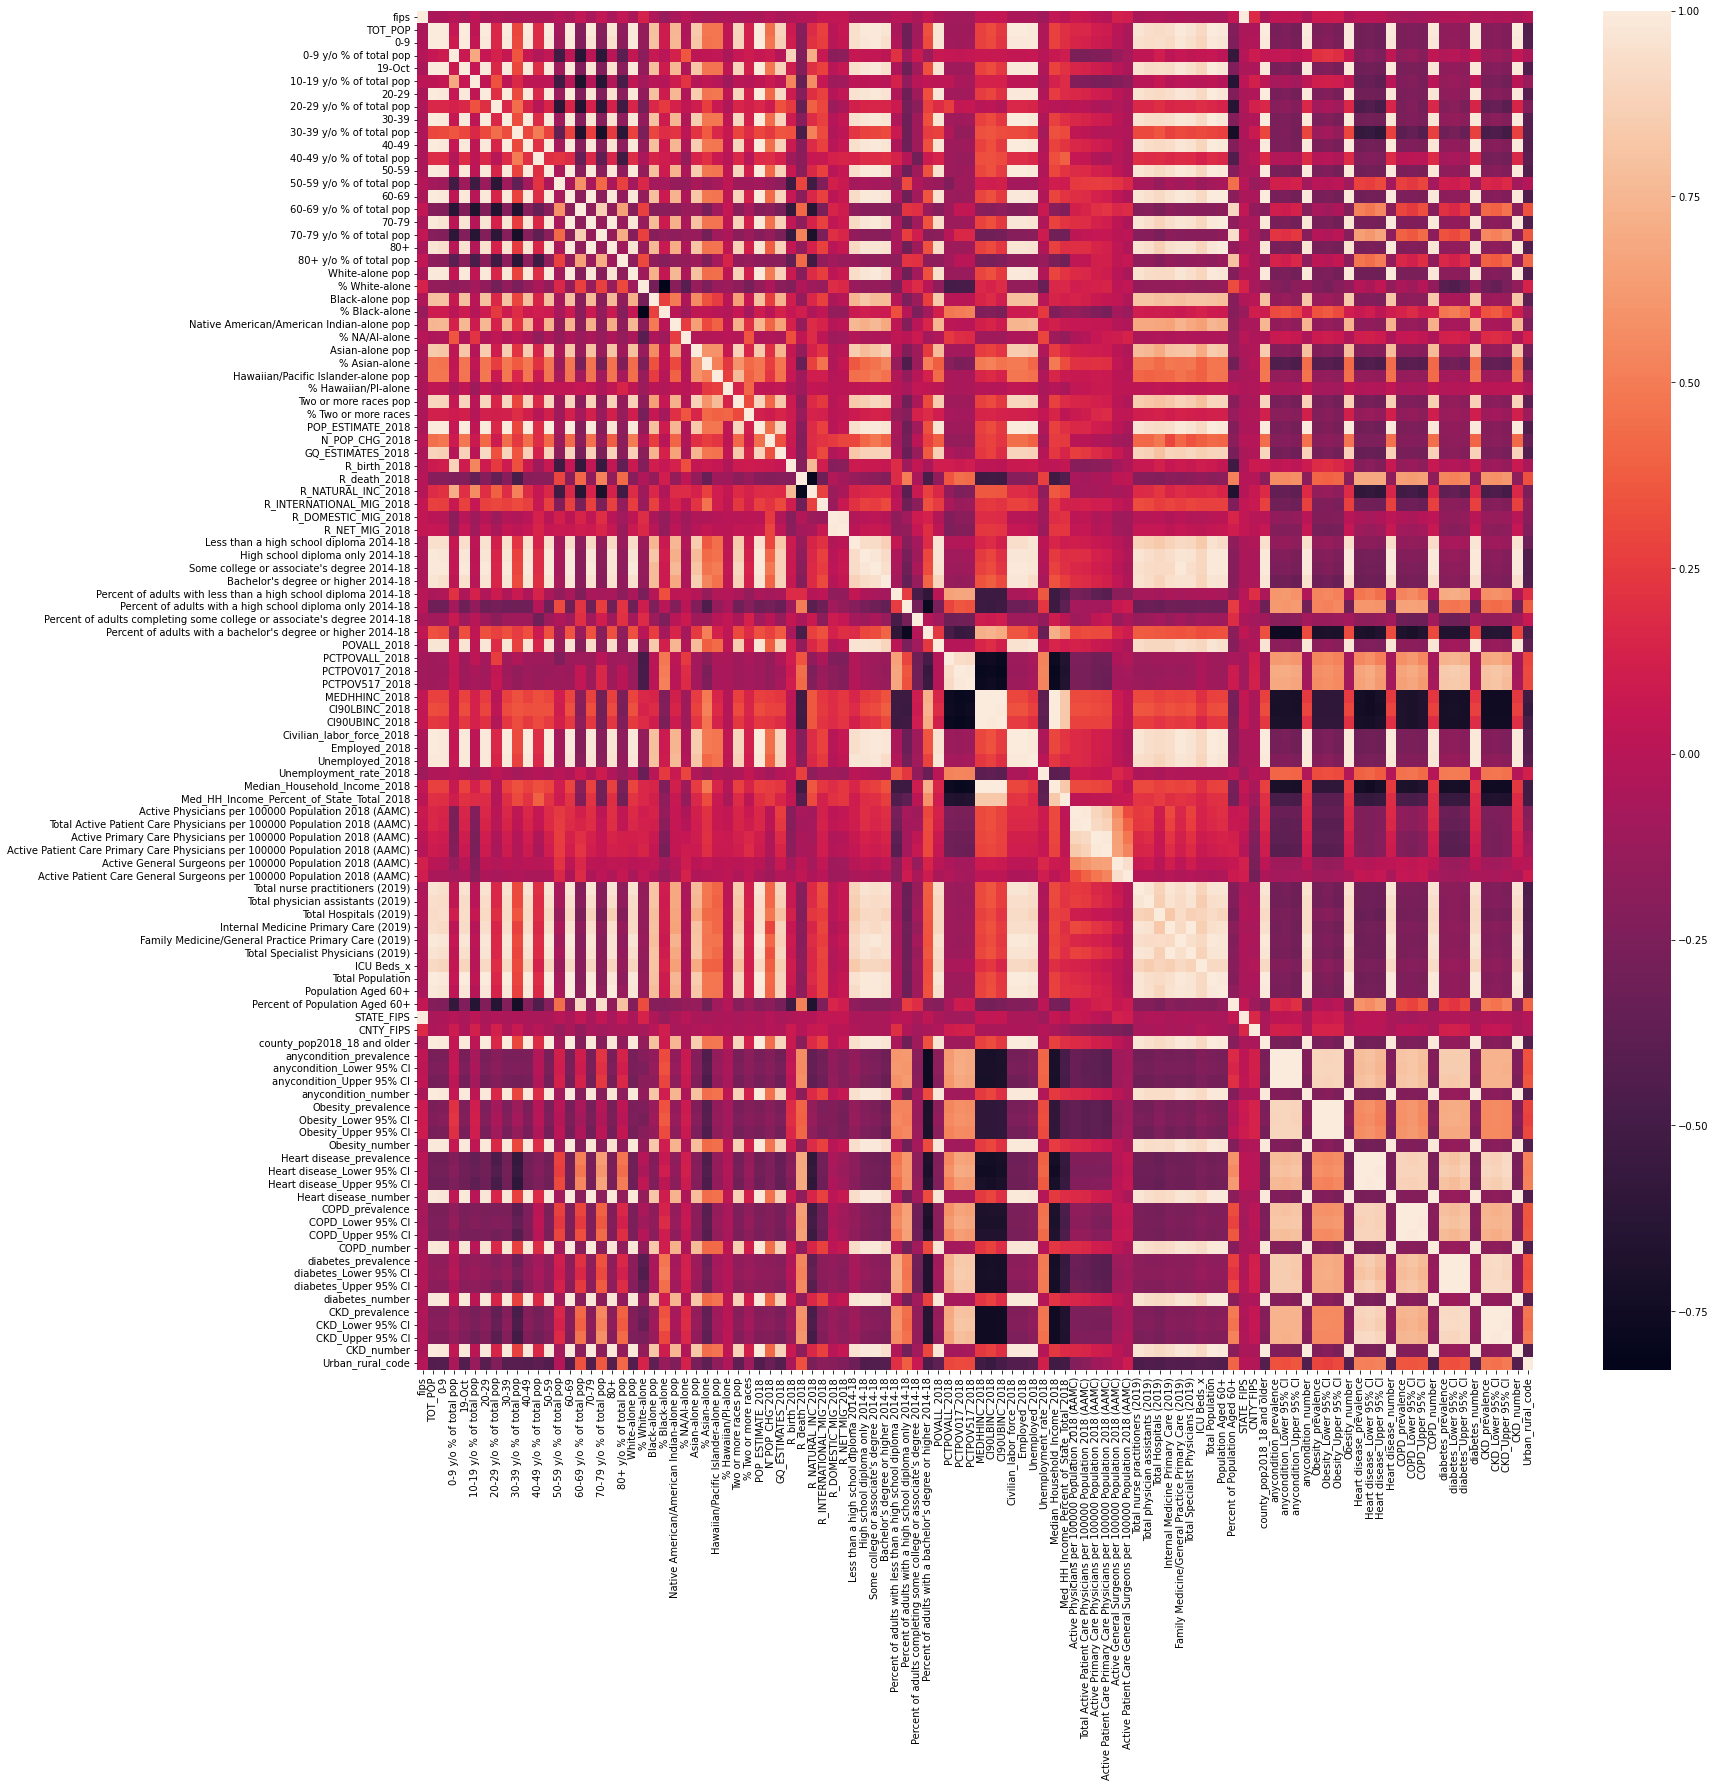

In [6]:
#Hacemos el EDA para ver q hacemos
#Step 2
#armo un correlation matrix   , mapa de calor
plt.figure(figsize=(25,25))
corr_matrix = df.corr()
hit_map = sns.heatmap(corr_matrix,annot=False)
plt.show()

#buscamos zonas bien ocuras las negras, son correlaciones negativas altas
#las claras son correlaciones positivas altas
#vemos q grupo 
#elegimos una variable, Camila nos pasa un codigo, vemos la var y aplicamos LASO


#Vemos las vars de salud y vemos algunas, me pide hacer la regresion, busco q vars estan correlacionadas entre si
#X = df[''] #esta es nuestra var X son las variables predictoras
#y = df['']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)


In [7]:
print(corr_matrix)

                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19

In [8]:
#Vamos a predecir la prevalencia de las enfermedades al corazon, usamos la var Heart disease_prevalence

df_heart_disease = pd.DataFrame(df.corrwith(df['Heart disease_prevalence'],axis=0),columns=['Correlacion'])

In [9]:
#filtramos y vemos los q son mayores a X numero, para establecer cierto umbral

df_heart_disease[abs(df_heart_disease['Correlacion']) > 0.8] #esto nos da las vars q vamos a sacar del modelo, las dropeamos

Correlacion
Heart disease_prevalence       1.000000
Heart disease_Lower 95% CI     0.997441
Heart disease_Upper 95% CI     0.997752
COPD_prevalence                0.886726
COPD_Lower 95% CI              0.877945
COPD_Upper 95% CI              0.890111
diabetes_prevalence            0.831021
diabetes_Lower 95% CI          0.806340
diabetes_Upper 95% CI          0.850717
CKD_prevalence                 0.892792
CKD_Lower 95% CI               0.874806
CKD_Upper 95% CI               0.908082

In [10]:
df_heart_disease[abs(df_heart_disease['Correlacion']) > 0.8].index #la lista de las vars a elminiar

Index(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],
      dtype='object')

In [12]:
x = df.drop(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],axis=1)
y = df['Heart disease_prevalence']

In [13]:
x.sample(5)

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
1769  33015   309176  30017                9.708710   36055   
1410  28023    15604   1765               11.311202    2013   
377   12119   128754   5032                3.908228    4922   
1039  21097    18778   2229               11.870274    2420   
244    8005   651215  82715               12.701642   84591   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop   30-39  \
1769                 11.661643  35317                 11.422944   36592   
1410                 12.900538   1841                 11.798257    1745   
377                   3.822794   6707                  5.209159    7848   
1039                 12.887421   2254                 12.003408    1993   
244                  12.989719  90450                 13.889422  100417   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
1769                 11.835330  39725                 12.848669  52130   
1410                 11.183030   1766                 11.317611   2147   
377                   6.095345   7650                  5.941563  11084   
1039                 10.613484   2366                 12.599851   2835   
244                  15.419946  88625                 13.609177  81460   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
1769                 16.860947  43004                 13.909230  24065   
1410                 13.759292   2116                 13.560625   1455   
377                   8.608665  30826                 23.941780  40336   
1039                 15.097454   2484                 13.228246   1440   
244                  12.508926  68797                 10.564407  36246   

      70-79 y/o % of total pop    80+  80+ y/o % of total pop  \
1769                  7.783593  12271                3.968937   
1410                  9.324532    756                4.844912   
377                  31.327959  14349               11.144508   
1039                  7.668548    757                4.031313   
244                   5.565904  17914                2.750858   

      White-alone pop  % White-alone  Black-alone pop  % Black-alone  \
1769           293326      94.873470             3489       1.128483   
1410             9981      63.964368             5403      34.625737   
377            116032      90.119142             9606       7.460739   
1039            17922      95.441474              436       2.321866   
244            499651      76.725966            74075      11.374892   

      Native American/American Indian-alone pop  % NA/AI-alone  \
1769                                        697       0.225438   
1410                                         75       0.480646   
377                                         519       0.403094   
1039                                         56       0.298221   
244                                        7461       1.145705   

      Asian-alone pop  % Asian-alone  Hawaiian/Pacific Islander-alone pop  \
1769             6895       2.230121                                  147   
1410               35       0.224301                                    1   
377              1228       0.953757                                   88   
1039               71       0.378102                                   13   
244             42147       6.472056                                 1885   

      % Hawaiian/PI-alone  Two or more races pop  % Two or more races  \
1769             0.047546                   4622             1.494941   
1410             0.006409                    109             0.698539   
377              0.068347                   1281             0.994921   
1039             0.069230                    280             1.491107   
244              0.289459                  25996             3.991923   

      POP_ESTIMATE_2018  N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  \
1769             309176            1895               2504           8.7   
1410        

In [14]:
df.shape #veo las vars q quedaron
#3140 observaciones en 108 columnas

(3140, 108)

In [38]:
df.describe(include='O')

COUNTY_NAME STATE_NAME
count         3140       3140
unique        1841         51
top     Washington      Texas
freq            31        254

In [15]:
x = x.drop(['COUNTY_NAME'], axis=1)

In [16]:
x = pd.get_dummies(x,drop_first=True) #toma vars categoricas y las pasa a dummies. los string los encodeo en 0 y 1

#scamos el county name porq es mucho agregar 1841 categorias lo podria dejar para otro estudio, ahora las elimino

In [17]:
x.sample(5)

fips  TOT_POP   0-9  0-9 y/o % of total pop  19-Oct  \
1041  21101    45591  5680               12.458599    5845   
2524  48007    23792  2257                9.486382    2357   
2720  48399    10234  1180               11.530193    1384   
1242  26027    51653  5410               10.473738    6440   
1463  28129    16002  1905               11.904762    2138   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
1041                 12.820513   5392                 11.826896   5581   
2524                  9.906691   2217                  9.318258   2216   
2720                 13.523549   1163                 11.364081   1207   
1242                 12.467814   5549                 10.742842   5500   
1463                 13.360830   1908                 11.923510   1764   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
1041                 12.241451   5488                 12.037464   6285   
2524                  9.314055   2386                 10.028581   3353   
2720                 11.794020   1108                 10.826656   1341   
1242                 10.647978   6095                 11.799895   7745   
1463                 11.023622   1896                 11.848519   2130   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
1041                 13.785616   5970                 13.094690   3526   
2524                 14.092972   3975                 16.707297   3469   
2720                 13.103381   1331                 13.005667    962   
1242                 14.994289   7771                 15.044625   5024   
1463                 13.310836   2075                 12.967129   1414   

      70-79 y/o % of total pop   80+  80+ y/o % of total pop  White-alone pop  \
1041                  7.733983  1824                4.000790            40398   
2524                 14.580531  1562                6.565232            22158   
2720                  9.400039   558                5.452414             9509   
1242                  9.726444  2119                4.102375            46293   
1463                  8.836395   772                4.824397            12006   

      % White-alone  Black-alone pop  % Black-alone  \
1041      88.609594             3751       8.227501   
2524      93.132145              406       1.706456   
2720      92.915771              247       2.413524   
1242      89.623062             2687       5.202021   
1463      75.028121             3826      23.909511   

      Native American/American Indian-alone pop  % NA/AI-alone  \
1041                                        151       0.331206   
2524                                        294       1.235709   
2720                                        168       1.641587   
1242                                        640       1.239037   
1463                                         32       0.199975   

      Asian-alone pop  % Asian-alone  Hawaiian/Pacific Islander-alone pop  \
1041              276       0.605383                                   45   
2524              475       1.996469                                   22   
2720              171       1.670901                                    5   
1242              422       0.816990                                   33   
1463               24       0.149981                                    2   

      % Hawaiian/PI-alone  Two or more races pop  % Two or more races  \
1041             0.098704                    970             2.127613   
2524             0.092468                    437             1.836752   
2720             0.048857                    134             1.309361   
1242             0.063888                   1578             3.055002   
1463             0.012498                    112             0.699913   

      POP_ESTIMATE_2018  N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  \
1041              45591            -398               1165          11.7   
2524              23792       

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=53, test_size=0.15)

In [22]:
#corremos las regresion Laso, para ver q var nos quedan, esto saca las otras var q no son redundantes para el modelo
modelo = Lasso(alpha = 0.3,normalize = True)
modelo.fit(X_train,y_train)


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.3, normalize=True)

In [23]:
#hacemos la prediccion y vemos el tipo de error

predicciones = modelo.predict(X_test)


In [26]:
rmse_lasso = mean_squared_error(y_true = y_test,
                                y_pred = predicciones,
                                squared = False
                               )
print(f"RMSE de test es: {rmse_lasso}")

RMSE de test es: 1.763186789771643


In [28]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error

modelo2 = LassoCV(
                    alphas = np.logspace(-10, 3, 200),
                    normalize = True,
                    cv = 10
                 )
_ = modelo2.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8210722286966075, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9171276780088533, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5575986178185417, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versi

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

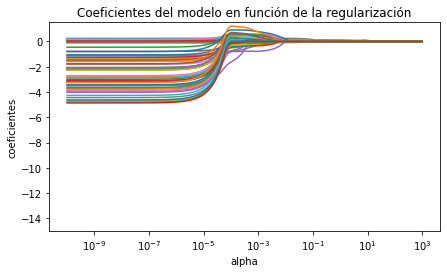

In [29]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo2.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')


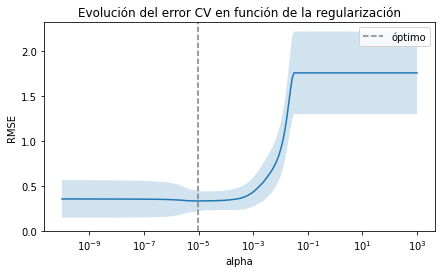

In [33]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)

mse_cv = modelo2.mse_path_.mean(axis=1)
mse_sd = modelo2.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse = np.min(rmse_cv)
sd_min_rmse = rmse_sd[np.argmin(rmse_cv)]
optimo = modelo2.alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo2.alphas_, rmse_cv)
ax.fill_between(
                modelo2.alphas_,
                rmse_cv + rmse_sd,
                rmse_cv - rmse_sd,
                alpha=0.2
                )

ax.axvline(
            x = optimo,
            c = "gray",
            linestyle = '--',
            label = 'óptimo'
          )



ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [34]:
#grafica q mide el error con los dif alfas, vemos el alfa optimo es 
print(f"Mejor valor de alpha encontrado: {modelo2.alpha_}")


Mejor valor de alpha encontrado: 9.221978823334342e-06


In [ ]:
#me llevo este numero al lasso q hice con metrica MRSE

In [35]:
alfa_optimo = modelo2.alpha_

modelo = Lasso(alpha = alfa_optimo,normalize = True)
modelo2.fit(X_train,y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8210722286966075, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9171276780088533, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5575986178185417, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versi

LassoCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        cv=10, normalize=True)

In [ ]:
#nos queda ver como imprimir las betas para ver las vars q me quedaron, ver la documentacion de laso y hacer comentarios sobre esto.
#vemos las var q quedaron y como quedaron los coeficientes.
#el objetivo era ver las vars socio demograficas estan imapactando en enfermedades del corazon
#podemos imporimir el r2, y otras metricas de evaluacion a partir del MRSE